## Part 1:

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
dt = 1/10  # time step
t = np.arange(0, 15+dt, dt).reshape(-1, 1)  # t vector (a column vector)

In [5]:
N = len(t)
D1 = (-np.diag(np.ones(N), -1) + np.diag(np.ones(N+1), 0)) / dt
D1[0, 0] = 1
D1[0, 1] = 0

In [6]:
# solving df/dt = g=cos(t) equation assuming f(0)= 1
f0 = 0
g = np.cos(1*t)

In [7]:
g_tilde = np.concatenate((np.array([f0]).reshape((1,1)), g))

In [8]:
f = np.linalg.inv(D1) @ g_tilde

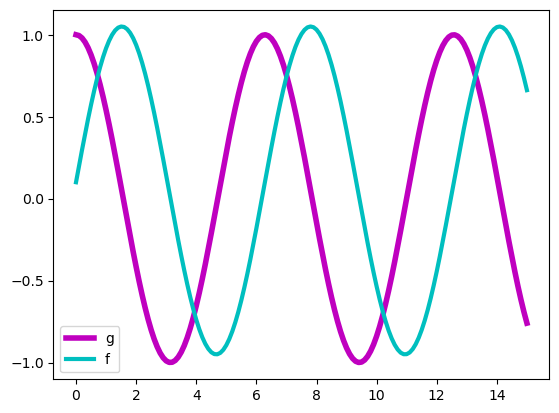

In [9]:
plt.figure(1)
plt.plot(t, g, '-m', linewidth=4,label="g")
plt.plot(t, f[1:], '-c', linewidth=3,label="f")

plt.legend()
plt.show()

In [10]:
# second order derivative
D2 = (-2*np.diag(np.ones(N+1), 0) + np.diag(np.ones(N), 1) + np.diag(np.ones(N), -1)) / dt**2

## Part 2:

### Example 1: solving df(x)/dx = -2x equation

In [11]:
# discretization of x axis
dx = 0.05
x = np.arange(0, 30+dx, dx).reshape(-1, 1)
n_x = len(x)

# representation of the 1st derivative w.r.t. x axis in a finite space
D1_x = (np.diag(np.ones(n_x-1), 1) - np.diag(np.ones(n_x), 0)) / dx
D1_x[n_x-1, 0] = 1 / dx

# representation of the 2nd derivative w.r.t. x axis in a finite space
D2_x = -(D1_x.T @ D1_x + D1_x @ D1_x.T) / 2

# modifying 1st & 2nd derivatives such that their determinants are nonzero,
# hence both become invertible
D1_x_tilde = D1_x.copy()
D1_x_tilde[0, :] = 0
D1_x_tilde[:, 0] = 0
D1_x_tilde[0, 0] = 1

D2_x_tilde = D2_x.copy()
D2_x_tilde[0, :] = 0
D2_x_tilde[:, 0] = 0
D2_x_tilde[0, 0] = 1
D2_x_tilde[1, 1] = 1 / dx
D2_x_tilde[1, 2] = -1 / dx

### Example 1: solving $\frac{df(x)}{dx} = -2x$ equation

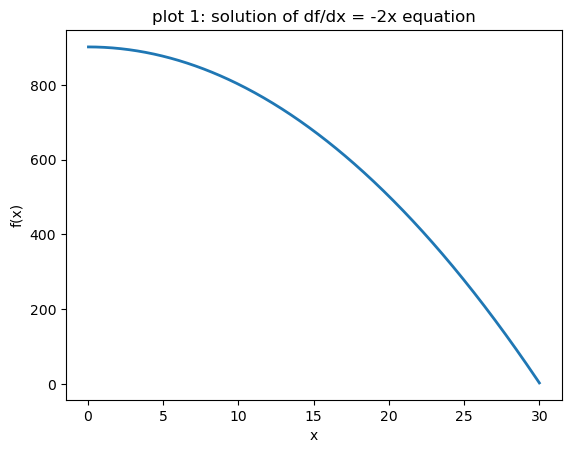

In [12]:
g_x_tilde = -2 * x
g_x_tilde[0] = 0
g_x_tilde[1] = 0

# D1_x_tilde @ f = g_x_tilde ==> f = n.linalg.inv(D1_x_tilde) @ g_x_tilde
f_x_tilde = np.linalg.inv(D1_x_tilde) @ g_x_tilde

plt.figure(1)
plt.plot(x[1:], f_x_tilde[1:], linewidth=2)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('plot 1: solution of df/dx = -2x equation')
plt.show()

### Example 2: solving $\frac{df(x)}{dx} = f(x)$ equation
### trick: we have to modify it as $\frac{df}{dx} - f(x) = a \delta(x) \rightarrow \left(\frac{d}{dx} - 1\right) f = a \delta(x)$ where $a$ is arbitrary and can be fixed using $f(x=0)$ value. Here, we use $a = 1$

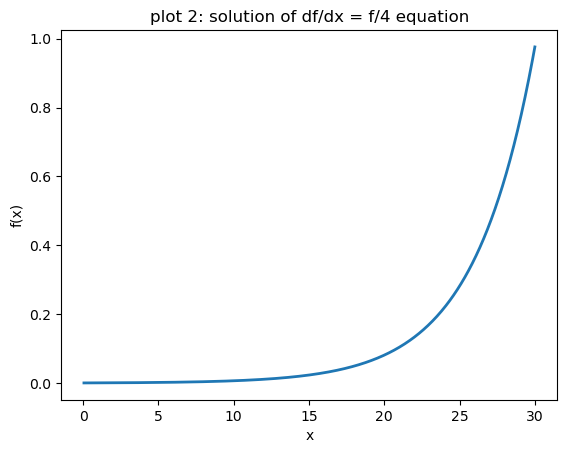

In [13]:
delta_x = np.zeros_like(x)
delta_x[0] = 1 / dx
# (D1_x - np.eye(n_x)/4) @ f(x) = -delta(x)
f_x_tilde = np.linalg.inv(D1_x - 1/4*np.eye(n_x)) @ (-delta_x)

plt.figure(2)
plt.plot(x[1:], f_x_tilde[1:], linewidth=2)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('plot 2: solution of df/dx = f/4 equation')
plt.show()


### Example 3: solving $\frac{d^2f}{dx^2} + f(x) = \delta(x)$ equation
### trick: we modify it as: $\frac{d^2f}{dx^2} + f(x) = \delta(x) \Rightarrow \left(\frac{d^2}{dx^2} + \text{eye}(n_x)\right) f = \delta(x) \Rightarrow f = \text{inv}\left(\frac{d^2}{dx^2} + \text{eye}(n_x)\right) \delta(x)$

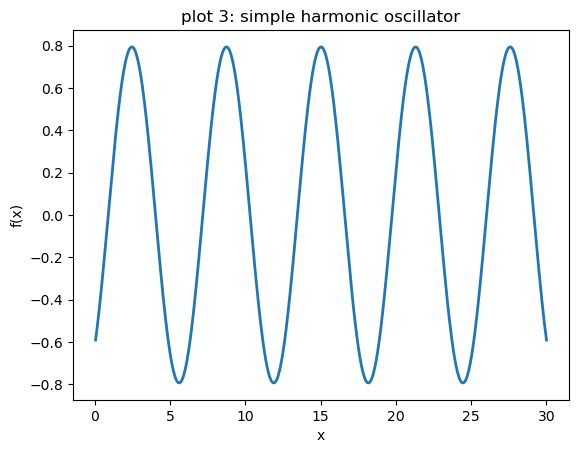

In [15]:
f_x_tilde = np.linalg.inv(D2_x + np.eye(n_x)) @ delta_x
plt.figure(3)
plt.plot(x[1:], f_x_tilde[1:], linewidth=2)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('plot 3: simple harmonic oscillator')
plt.show()

### Example 4: solving $\frac{d^2f}{dx^2} + \gamma \frac{df}{dx} + f(x) = 0$ equation (damped harmonic oscillator)
### trick: we modify it as $\frac{d^2f}{dx^2} + \gamma \frac{df(x)}{dx} + f(x) = \delta(x) \Rightarrow \left(\frac{d^2}{dx^2} + \gamma \frac{d}{dx} + \text{eye}(n_x)\right) f = \delta(x) \Rightarrow f = \text{inv}\left(\frac{d^2}{dx^2} + \gamma \frac{d}{dx} + \text{eye}(n_x)\right) \delta(x)$

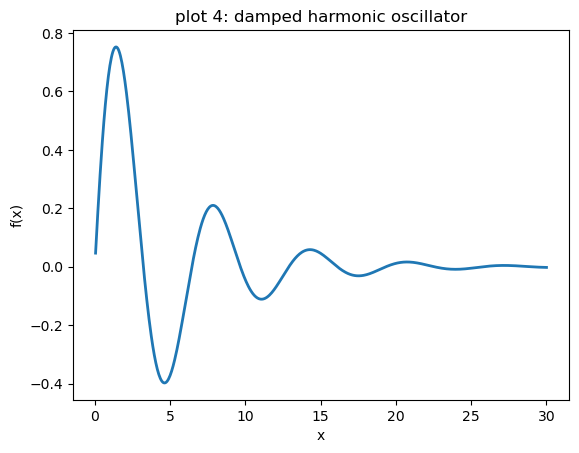

In [16]:
gamma = 0.4
f_x_tilde = np.linalg.inv(D2_x + gamma * D1_x + np.eye(n_x)) @ delta_x
plt.figure(4)
plt.plot(x[1:], f_x_tilde[1:], linewidth=2)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('plot 4: damped harmonic oscillator')
plt.show()

### Example 5: solving $\frac{d^2f}{dx^2} + \gamma \frac{df}{dx} + f(x) = g(x)$ equation (driven damped harmonic oscillator)
### $f = \text{inv}(\frac{d^2}{dx^2} + \gamma \frac{d}{dx} + \text{eye}(n_x)) \cdot g(x)$

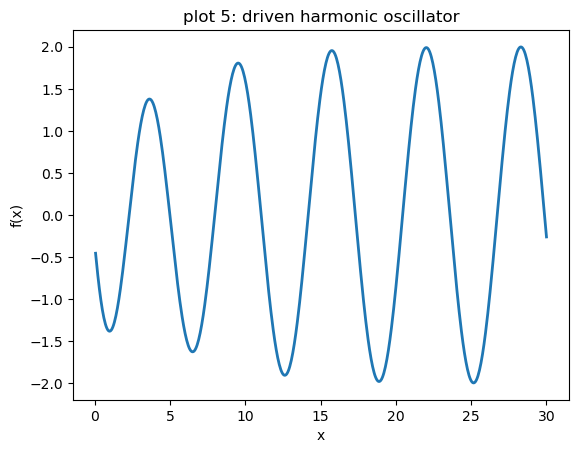

In [17]:
g_x = np.sin(x)

gamma = 0.5
f_x_tilde = np.linalg.inv(D2_x + gamma * D1_x + np.eye(n_x)) @ g_x
plt.figure(5)
plt.plot(x[1:], f_x_tilde[1:], linewidth=2)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('plot 5: driven harmonic oscillator')
plt.show()

## Part 3:

In [29]:
import numpy as np
import matplotlib.pyplot as plt

In [30]:
def f(x:int):
    """
    This function print the value of x and returns the square of x

    Args:
    x: int

    returns:
    x**2:int

    example:
    f(2)

    2,4
    """
    print(x)
    return x**2


In [31]:
f.__doc__

'\n    This function print the value of x and returns the square of x\n\n    Args:\n    x: int\n\n    returns:\n    x**2:int\n\n    example:\n    f(2)\n\n    2,4\n    '

In [32]:
# Define the potential function
def V_x_diag(x):
    return np.where(np.abs(x) < 3, 0, 1 - np.cos(x/10))

# Define the Hamiltonian operator
def Hamiltonian_operator(P1_x, m, x):
    v_x_diag = np.diag(V_x_diag(x))
    H = (P1_x.T @ P1_x + P1_x @ P1_x.T) / (2 * (2 * m)) + v_x_diag
    return H

# Diagonalize the Hamiltonian operator
def diagonalize_operator(H):
    eigenvalues, eigenvectors = np.linalg.eig(H)
    return eigenvalues, eigenvectors

# Plot the probability distribution function
def plot_pdf(x, psi):
    plt.plot(x, np.abs(psi)**2, linewidth=2)

# Plot the energy eigenvalues
def plot_energy_eigenvalues(E):
    nE = len(E)
    a = np.zeros(nE)
    plt.plot(a, E, '-s', markersize=10, markeredgecolor='red', markerfacecolor=[1, .6, .6])
    plt.ylabel('E(n)')
    plt.title('Lowest 6 energy eigenvalues')

# Generate a random Hermitian matrix
def generate_hermitian_matrix():
    M0 = 10 * (np.random.randn(3, 3) + 1j * np.random.rand(3, 3))
    M1 = (M0 + M0.conj().T) / 2
    return M1

# Diagonalize a Hermitian matrix
def diagonalize_hermitian_matrix(M1):
    eigenvalues, eigenvectors = np.linalg.eig(M1)
    return eigenvalues, eigenvectors

# Calculate the overlap between vectors
def calculate_overlap(v1, v2):
    overlap = np.vdot(v1, v2)
    return overlap

# Calculate the product of matrices
def calculate_matrix_product(A, B):
    product = np.dot(A, B)
    return product

In [33]:
# Main code
x = np.linspace(-10, 10, 100)
P1_x = np.eye(len(x))
m = 1

In [34]:
V_x_diag(x)

array([0.45969769, 0.44280969, 0.42614907, 0.40972265, 0.39353713,
       0.37759911, 0.3619151 , 0.34649149, 0.33133458, 0.31645057,
       0.30184551, 0.28752538, 0.27349601, 0.25976313, 0.24633235,
       0.23320915, 0.22039888, 0.20790678, 0.19573793, 0.18389731,
       0.17238974, 0.16121993, 0.15039244, 0.13991167, 0.12978191,
       0.1200073 , 0.11059182, 0.10153931, 0.09285347, 0.08453784,
       0.07659582, 0.06903065, 0.06184542, 0.05504305, 0.04862633,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.04862633, 0.05504305, 0.06184542, 0.06903065, 0.07659582,
       0.08453784, 0.09285347, 0.10153931, 0.11059182, 0.12000

In [35]:
V_x = V_x_diag(x)
H = Hamiltonian_operator(P1_x, m, x)
eigenvalues, eigenvectors = diagonalize_operator(H)

In [36]:
E1 = eigenvalues[0]
psi_1 = eigenvectors[:, 0]
E2 = eigenvalues[1]
psi_2 = eigenvectors[:, 1]

Text(0.5, 1.0, 'Potential function')

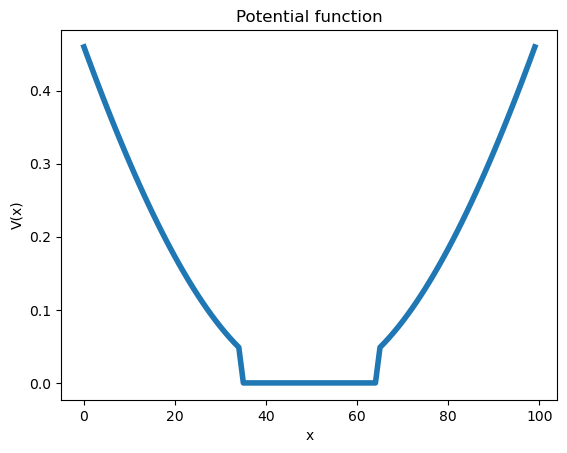

In [37]:
plt.figure(1)
plt.plot(V_x, linewidth=4)
plt.xlabel('x')
plt.ylabel('V(x)')
plt.title('Potential function')

Text(0.5, 1.0, 'Probability distribution function')

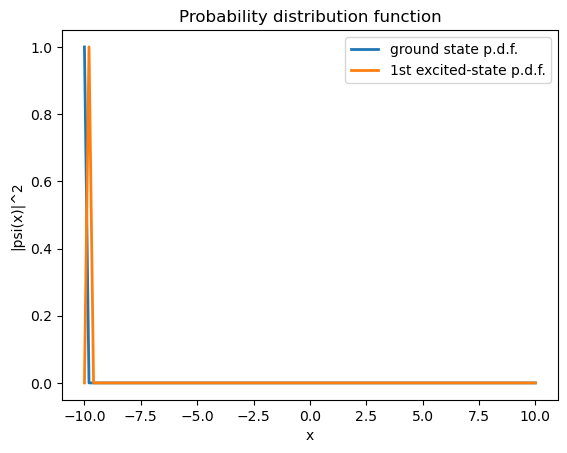

In [38]:
plt.figure(2)
plt.plot(x, np.abs(psi_1)**2, linewidth=2)
plt.plot(x, np.abs(psi_2)**2, linewidth=2)
plt.xlabel('x')
plt.ylabel('|psi(x)|^2')
plt.legend(['ground state p.d.f.', '1st excited-state p.d.f.'])
plt.title('Probability distribution function')

Text(0.5, 1.0, 'Lowest 6 energy eigenvalues')

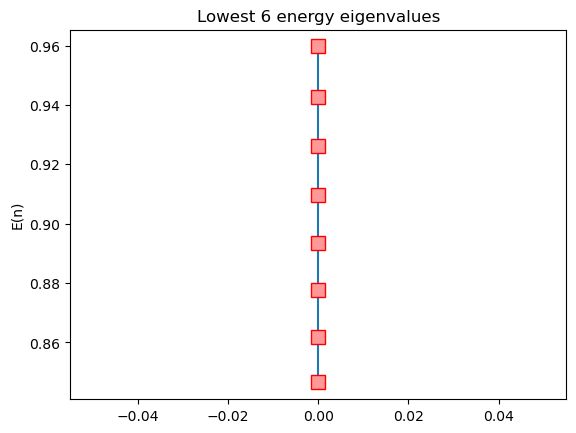

In [39]:
plt.figure(3)
nE = 8
a = np.zeros(nE)
b = eigenvalues[:nE]
plt.plot(a, b, '-s', markersize=10, markeredgecolor='red', markerfacecolor=[1, .6, .6])
plt.ylabel('E(n)')
plt.title('Lowest 6 energy eigenvalues')

In [40]:

M1 = generate_hermitian_matrix()
eigenvalues, eigenvectors = diagonalize_hermitian_matrix(M1)

v1 = eigenvectors[:, 0]
v2 = eigenvectors[:, 1]
v3 = eigenvectors[:, 2]

In [41]:

overlap_11 = calculate_overlap(v1, v1)
overlap_12 = calculate_overlap(v1, v2)
overlap_13 = calculate_overlap(v1, v3)
overlap_21 = calculate_overlap(v2, v1)
overlap_22 = calculate_overlap(v2, v2)
overlap_23 = calculate_overlap(v2, v3)
overlap_31 = calculate_overlap(v3, v1)
overlap_32 = calculate_overlap(v3, v2)
overlap_33 = calculate_overlap(v3, v3)

prod_U_Md_Udag = calculate_matrix_product(calculate_matrix_product(eigenvectors, np.diag(eigenvalues)), eigenvectors.conj().T)

prod_U_Udag = calculate_matrix_product(eigenvectors, eigenvectors.conj().T)

id_resolution = np.outer(v1, v1.conj()) + np.outer(v2, v2.conj()) + np.outer(v3, v3.conj())


(1.1535911115245767e-16-1.3877787807814457e-17j)

## Part 4:

In [46]:
import numpy as np
import matplotlib.pyplot as plt

In [47]:
dx = 0.2
x = np.arange(-4, 4 + dx, dx)
y = x
omega = 1
m = 1
hbar = 1

In [48]:
n_x = len(x)
n_y = n_x
D1 = np.diag(np.ones(n_x - 1), 1) - np.diag(np.ones(n_x), 0)
D1[-1, 0] = 1
p1_x = (hbar / (1j)) * D1
p1_y = p1_x

In [49]:
p2_x = (np.transpose(p1_x) @ p1_x + p1_x @ np.transpose(p1_x)) / 2
p2_y = p2_x

In [50]:
id_x = np.eye(n_x)
id_y = np.eye(n_y)

In [51]:
X = np.kron(np.diag(x), id_y)
Y = np.kron(id_x, np.diag(y))

In [52]:
P1_x = np.kron(p1_x, id_y)
P1_y = np.kron(id_x, p1_y)

In [53]:
P2_x = np.kron(p2_x, id_y)
P2_y = np.kron(id_x, p2_y)

In [54]:
H = (np.transpose(P1_x) @ P1_x + P1_x @ np.transpose(P1_x)) / (4 * m) + (np.transpose(P1_y) @ P1_y + P1_y @ np.transpose(P1_y)) / (4 * m) + m * omega**2 * (X**2 + Y**2) / 2

In [55]:
Vxy = np.reshape(np.diag(m * omega**2 * (X**2 + Y**2) / 2) ,(n_y, n_x))

Text(0.5, 0.92, 'Potential function')

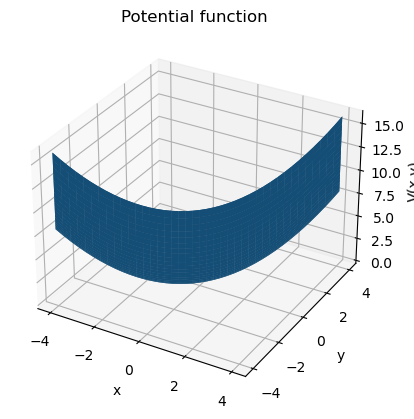

In [56]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(111, projection='3d')
ax1.plot_surface(x, y, Vxy, linewidth=4)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('V(x,y)')
ax1.set_title('Potential function')

In [57]:
Hd,psi = np.linalg.eigh(H)
E = np.sort(Hd)
E1 = E[0]

In [60]:
psi_1 = psi[:, 0]
psi_1 = np.reshape(psi_1, (n_y, -1))

Text(0.5, 0.92, 'Probability distribution function of the ground state')

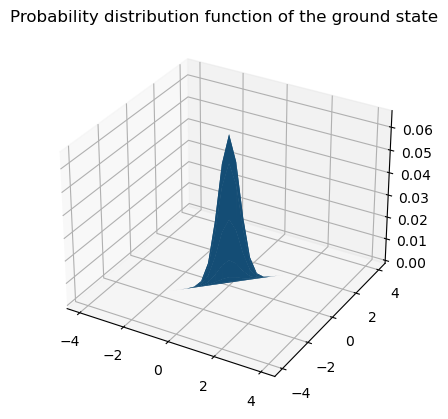

In [61]:
fig2 = plt.figure()
ax2 = fig2.add_subplot(111, projection='3d')
ax2.plot_surface(x, y, np.abs(psi_1)**2)
ax2.set_title('Probability distribution function of the ground state')

In [62]:
E2 = E[1]
psi_2 = psi[:, 1]
psi_2 = np.reshape(psi_2, (n_y, -1))

Text(0.5, 0.92, 'Probability distribution function of the 1st excited state')

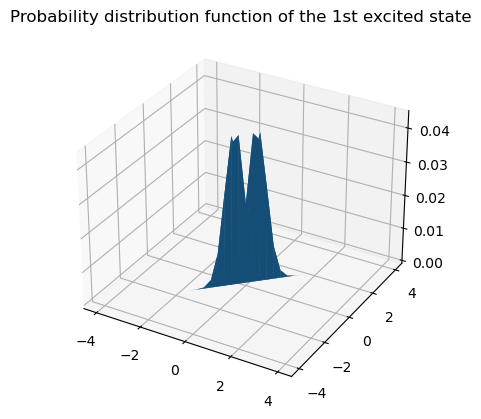

In [63]:
fig3 = plt.figure()
ax3 = fig3.add_subplot(111, projection='3d')
ax3.plot_surface(x, y, np.abs(psi_2)**2)
ax3.set_title('Probability distribution function of the 1st excited state')

Text(0.5, 1.0, 'Lowest 6 energy eigenvalues')

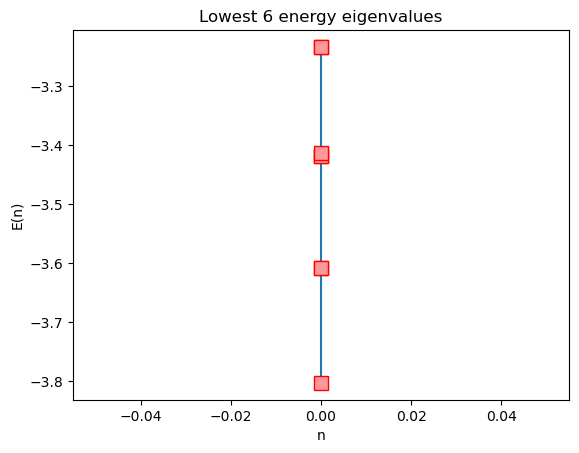

In [65]:
fig4 = plt.figure()
nE = 8
a = np.zeros(nE)
b = E[:nE]
plt.plot(a, b, '-s', markersize=10, markeredgecolor='red', markerfacecolor=[1, 0.6, 0.6])
plt.xlabel('n')
plt.ylabel('E(n)')
plt.title('Lowest 6 energy eigenvalues')

In [66]:
print(E)

[-3.80253249 -3.60766653 -3.60766653 ... 14.6400852  14.6400852
 15.37106833]


In [129]:
for i1 = 1:L
    i1_p = mod(i1,L)+1; %i1_p = i1 + 1 mod L       
    i1_m = mod(i1-2,L)+1; %i1_p = i1 - 1 mod L
    H = H + V1*kron(n_1p{i1},n_1p{i1_p}+n_1p{i1_m});
end

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


In [ ]:
for i in range(L):
    i_p = (i%L)+1 
    i_m = (i-2)%L+1
    H +=  V1*np.kron(n1_p[i],n1_p[i_p]+n_1p[i_m])